2022-10-14 to 21
- [x] In each cluster what is the sample composition?
- [x] What is the mitochondrial gene ratio in UMAP form?

2022-10-28
- [x] Fixed last mitoRatio figures (with proper x-axis and fill colour)
- [x] Update UMAPs for Cell Cycle Genes
- [x] Make Dot Plot figure for Cell Cycle Genes 
	- [x] Per GBM subtype
	- [x] Per tumor
    
2022-11-01
- [x] Make Dot Plot figure for Cell Cycle Genes (integrated assay)
	- [x] UMAP
	- [x] Per cluster

## Load Libraries and Tools

In [1]:
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

[1] "/home/samkyy/R/x86_64-pc-linux-gnu-library/tcga-gbm-R4/renv/library/R-4.0/x86_64-pc-linux-gnu"
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                               
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

In [2]:
resultsPath <- "~/scratch/gete-gbm/results"
getwd()

[1] "/scratch/samkyy/gete-gbm/results/GBMGSCTE"

In [3]:
library(ggplot2)
library(dplyr)
source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is maske

In [4]:
library(tidyverse)
library(conflicted)
conflict_prefer("select", "dplyr") ## required in %>% dplyr
conflict_prefer("rowRanges", "MatrixGenerics") # required in new_cell_data_set()

[conflicted] Will prefer dplyr::select over any other package

[conflicted] Will prefer MatrixGenerics::rowRanges over any other package



## Load Data

In [5]:
gte <- readRDS("/home/samkyy/projects/def-ytanaka/common/te-gbm_proj/analysis/gte_gbmscIntUmap-subtypes.rds") 

In [6]:
colnames(gte@meta.data)

[1] "orig.ident"                 "nUMI"                      
 [3] "nGene"                      "log10GenesPerUMI"          
 [5] "mitoRatio"                  "cells"                     
 [7] "sample"                     "nCount_RNA"                
 [9] "nFeature_RNA"               "GBM_integrated_snn_res.0.8"
[11] "GBM_seurat_clusters"        "neuro.ident"               
[13] "nCount_integrated"          "nFeature_integrated"       
[15] "integrated_snn_res.0.7"     "seurat_clusters"           
[17] "MGMTme"                     "sampleCombined"            
[19] "integrated_snn_res.0.2"     "integrated_snn_res.0.3"    
[21] "integrated_snn_res.0.4"     "integrated_snn_res.0.5"    
[23] "integrated_snn_res.0.6"     "teRatio"                   
[25] "gbm_subtype"

## Sample Composition

In [12]:
Idents(gte) <- "integrated_snn_res.0.3"

In [13]:
DefaultAssay(gte) <- "RNA"

In [14]:
sampleNames <- unique(gte$sampleCombined)

In [30]:
df_gte <- gte@meta.data %>%
                group_by(sampleCombined) %>%
                count(integrated_snn_res.0.3)
df_gte$sampleCombined <- factor(df_gte$sampleCombined, levels = sampleNames)

In [47]:
df_gte <- df_gte %>% 
            group_by(integrated_snn_res.0.3) %>% 
            mutate(freq = (n / sum(n))*100) %>%
            mutate(rounded = round(freq, 2))
# df_gte %>% mutate(across(4, round, 2))
head(df_gte)

sampleCombined,integrated_snn_res.0.3,n,freq,rounded
<fct>,<fct>,<int>,<dbl>,<dbl>
SF11159,0,566,6.450142,6.45
SF11159,1,513,6.011249,6.01
SF11159,2,307,3.794808,3.79
SF11159,3,539,7.638889,7.64
SF11159,4,138,2.761104,2.76
SF11159,5,394,8.912011,8.91


Ref for colorblind color palette: http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/

In [90]:
# cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", 
#                "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#CC79A7", "#ff716e", "#999999", "#0072B2", "#194c76", "#D55E00")
    # with grey and black and analogous magenta 

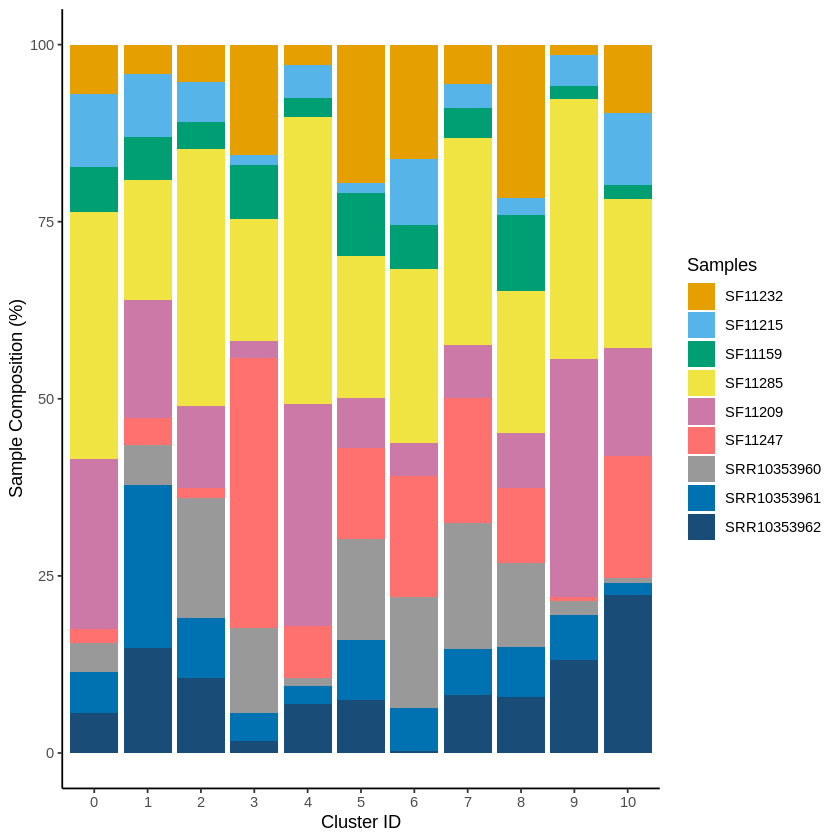

In [100]:
p2 <- df_gte %>% 
    ggplot(aes(x=integrated_snn_res.0.3, y=rounded, fill=sampleCombined)) + 
        scale_fill_manual(values = cbPalette) + 
        geom_bar( stat="identity", width = 0.9) + theme_classic() + 
        labs(y = "Sample Composition (%)", x = "Cluster ID", fill= "Samples")
        
p2

In [96]:
size = 6
ggsave("r_gbmsc_PC20r03_SampleCompositionPerCluster.tiff", units="in", width=size, height=size*0.7, dpi=300, compression = 'lzw')

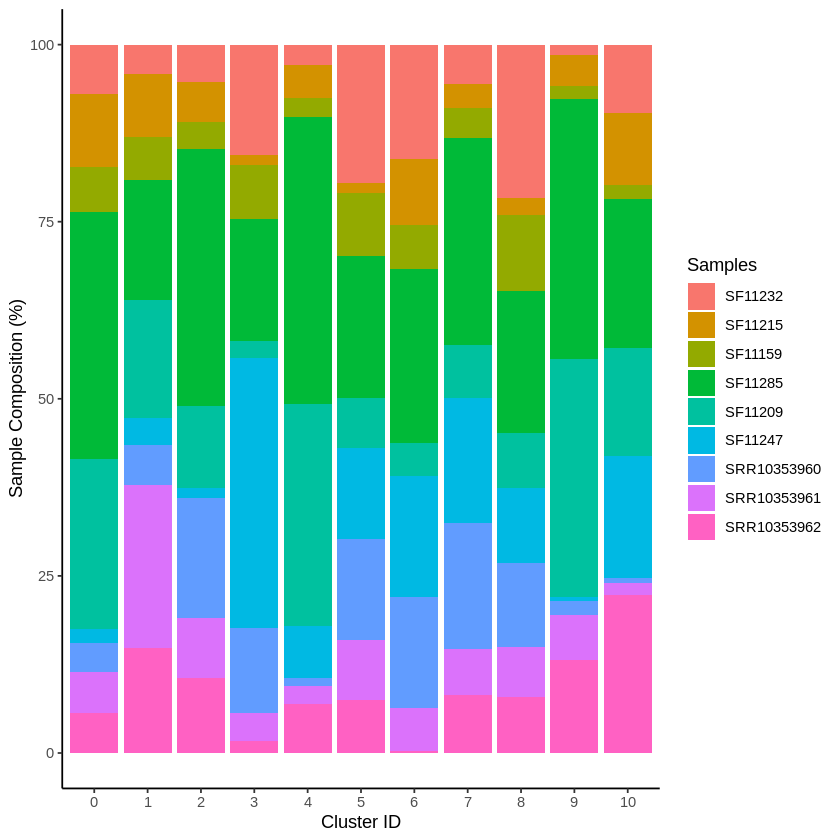

In [101]:
p2 <- df_gte %>% 
    ggplot(aes(x=integrated_snn_res.0.3, y=rounded, fill=sampleCombined)) + 
#         scale_fill_manual(values = cbPalette) + 
        geom_bar( stat="identity", width = 0.9) + theme_classic() + 
        labs(y = "Sample Composition (%)", x = "Cluster ID", fill= "Samples")
        
p2

In [102]:
size = 6
ggsave("r_gbmsc_PC20r03_SampleCompositionPerCluster_rgb.tiff", units="in", width=size, height=size*0.7, dpi=300, compression = 'lzw')

## Mitochondrial Ratio

In [8]:
setwd("/home/samkyy/scratch/gete-gbm/results/2022-10-14")
getwd()

[1] "/scratch/samkyy/gete-gbm/results/2022-10-14"

In [9]:
Idents(gte) <- "integrated_snn_res.0.3"

In [10]:
DefaultAssay(gte) <- "integrated"

In [7]:
summary(gte$mitoRatio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01311 0.02534 0.02930 0.03805 0.19969 

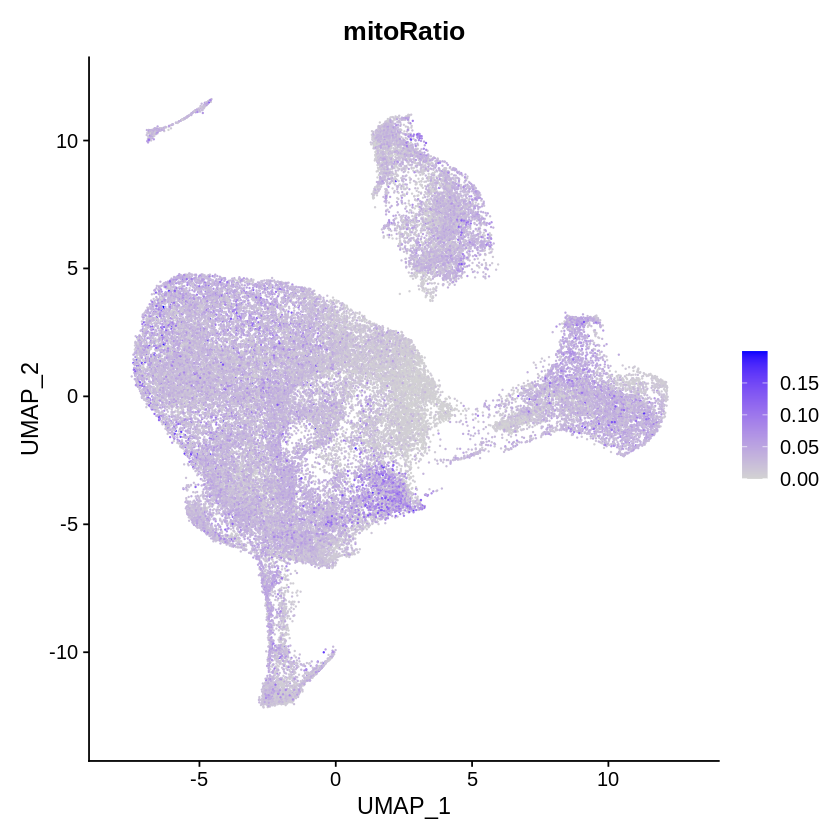

In [23]:
p2 <- FeaturePlot(object = gte, features = "mitoRatio")
p2

### Bar graph - mitoRatio

In [24]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

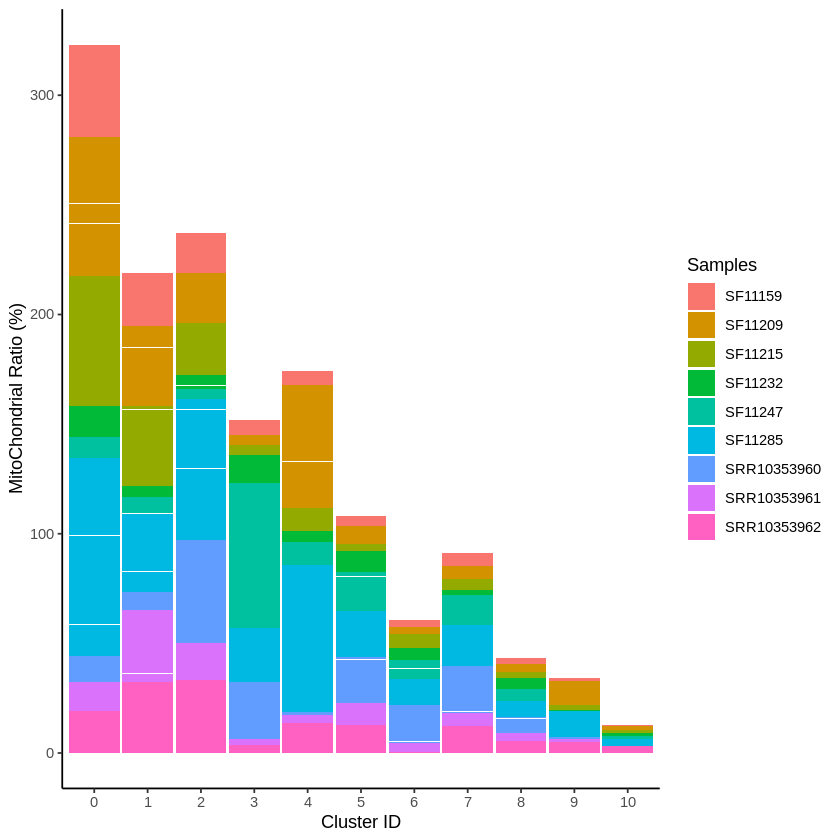

In [24]:
# Average mitoRatio per cluster
p2 <- gte@meta.data %>%
        ggplot(aes(x=integrated_snn_res.0.3, y=mitoRatio, fill= sampleCombined)) + 
        geom_bar( stat="identity", width = 0.95) + theme_classic() +
        labs(y = "MitoChondrial Ratio (%)", x = "Cluster ID", fill= "Samples")
p2

In [25]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_bar_defaultcol.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [35]:
# cbPalette <- c("#999999", "#E69F00", "#56B4E9", "#009E73", 
#                "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", 
               "#CC79A7", "#ff716e", "#999999", "#0072B2", "#194c76", "#D55E00", "#4C4E52")
    # with grey and black and analogous magenta 

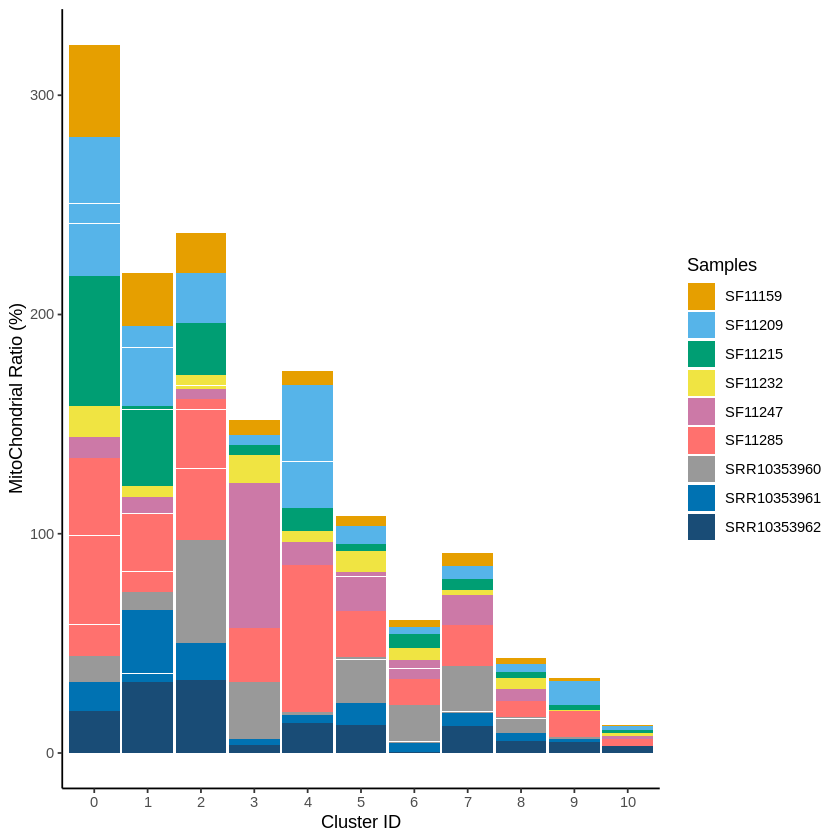

In [26]:
# Average mitoRatio per cluster
p2 <- gte@meta.data %>%
        ggplot(aes(x=integrated_snn_res.0.3, y=mitoRatio, fill= sampleCombined)) + 
        scale_fill_manual(values = cbPalette) + 
        geom_bar( stat="identity", width = 0.95) + theme_classic() + 
        labs(y = "MitoChondrial Ratio (%)", x = "Cluster ID", fill= "Samples")
p2

In [27]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_bar_blindcol.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

### Violin Plot - Average expression / cell in each cluster

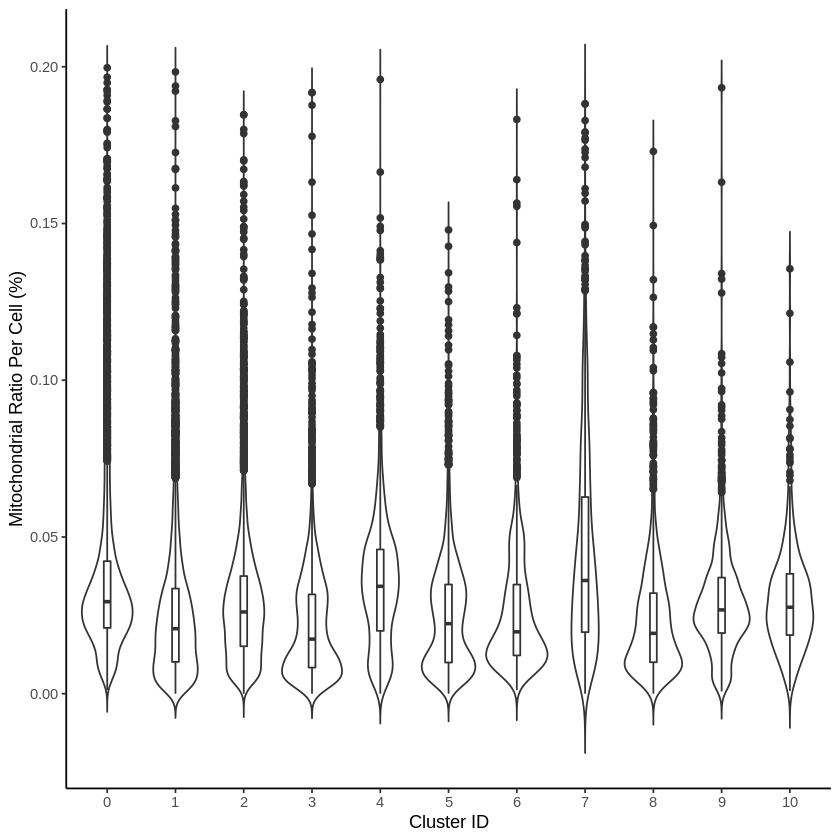

In [28]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=integrated_snn_res.0.3, y=mitoRatio)) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1) + xlab("Cluster ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
#         geom_violin(trim=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)
        theme_classic()
p2

In [29]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_nocolor.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

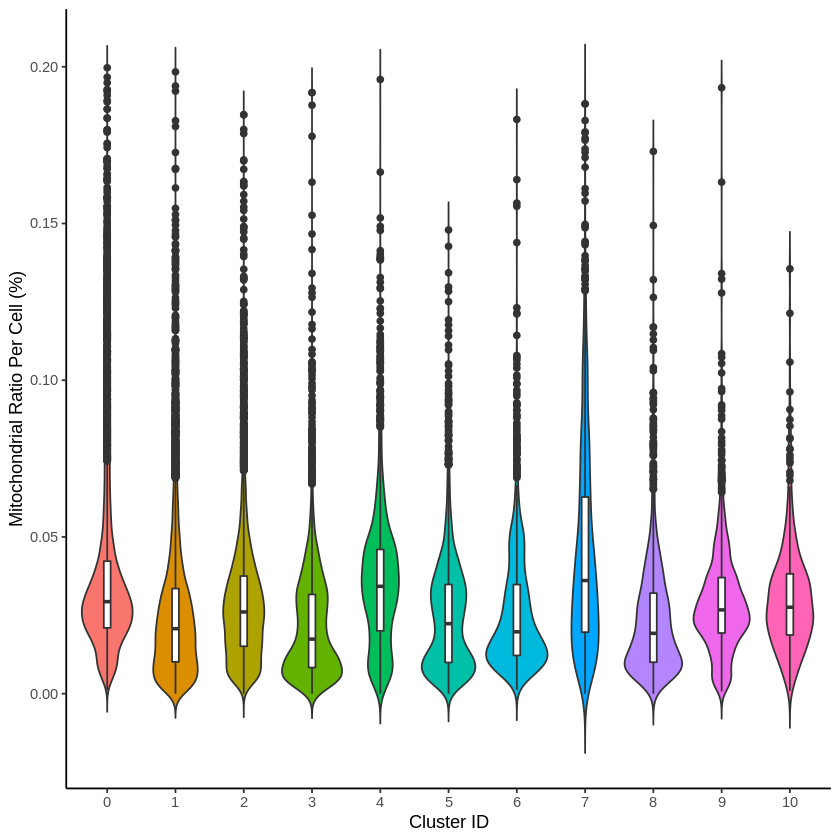

In [31]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=integrated_snn_res.0.3, y=mitoRatio, fill=integrated_snn_res.0.3)) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1, fill="white") + xlab("Cluster ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
#         geom_violin(trim=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)
        theme_classic() + NoLegend()
p2

In [32]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_defcolor.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

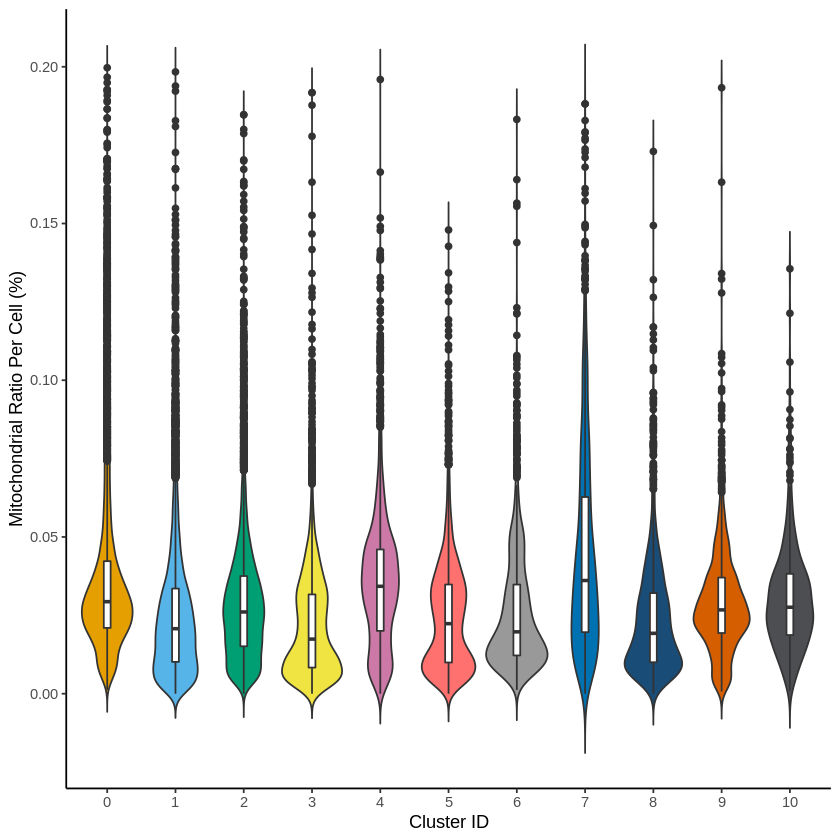

In [36]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=integrated_snn_res.0.3, y=mitoRatio, fill=integrated_snn_res.0.3)) + 
        scale_fill_manual(values = cbPalette) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1, fill="white") + xlab("Cluster ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
#         geom_violin(trim=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)
        theme_classic() + NoLegend()
p2

In [37]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_blindcolor.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

### Violin Plot - Average expression / cell in each sample

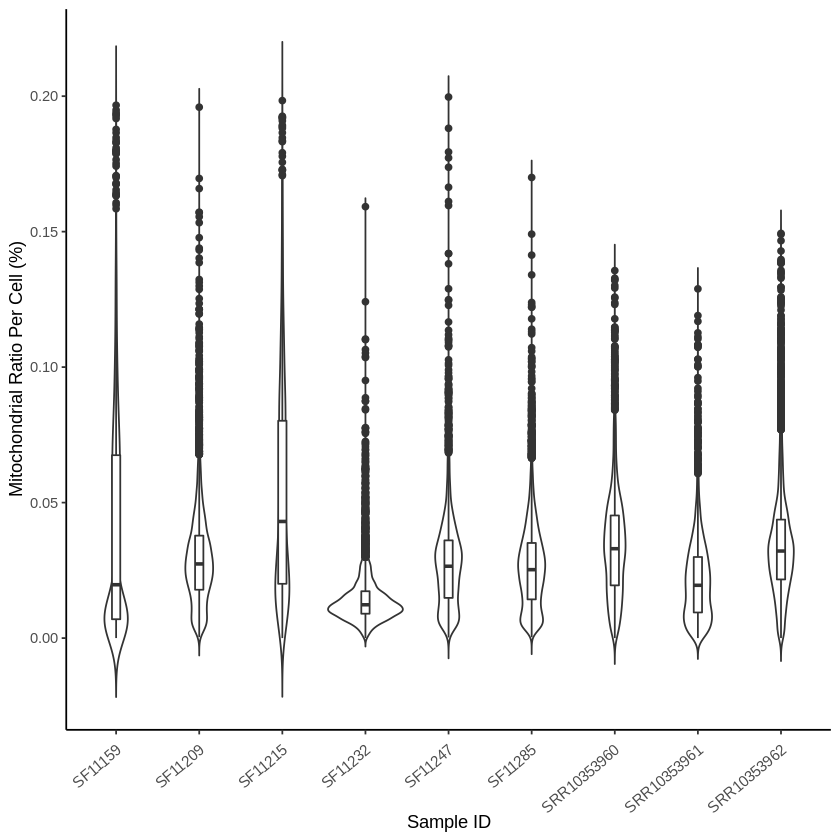

In [45]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=sampleCombined, y=mitoRatio)) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1) + xlab("Sample ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
#         geom_violin(trim=FALSE) + geom_dotplot(binaxis='y', stackdir='center', dotsize=0.1)
        theme_classic() + theme(axis.text.x = element_text(angle = 40, vjust = 0.9, hjust=1))
p2

In [46]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_bysample_nocolor.tiff", units="in", width=size*0.8, height=size, dpi=300, compression = 'lzw')

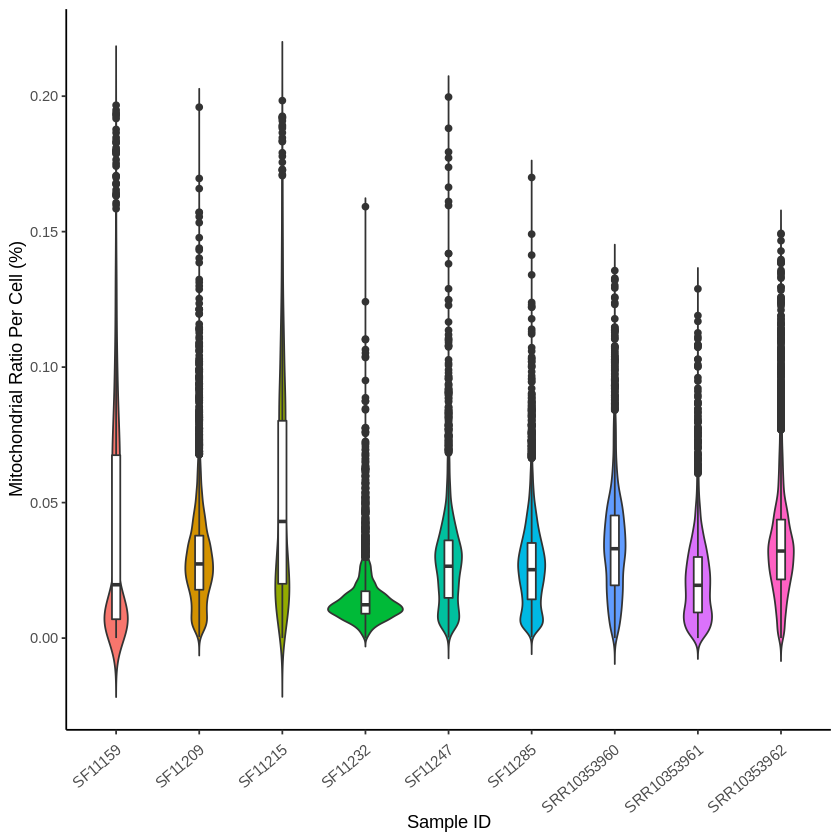

In [12]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=sampleCombined, y=mitoRatio, fill=sampleCombined)) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1, fill="white") + xlab("Sample ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
        theme_classic() + NoLegend() + theme(axis.text.x = element_text(angle = 40, vjust = 0.9, hjust=1))
p2

In [13]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_bysample_defcolor.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

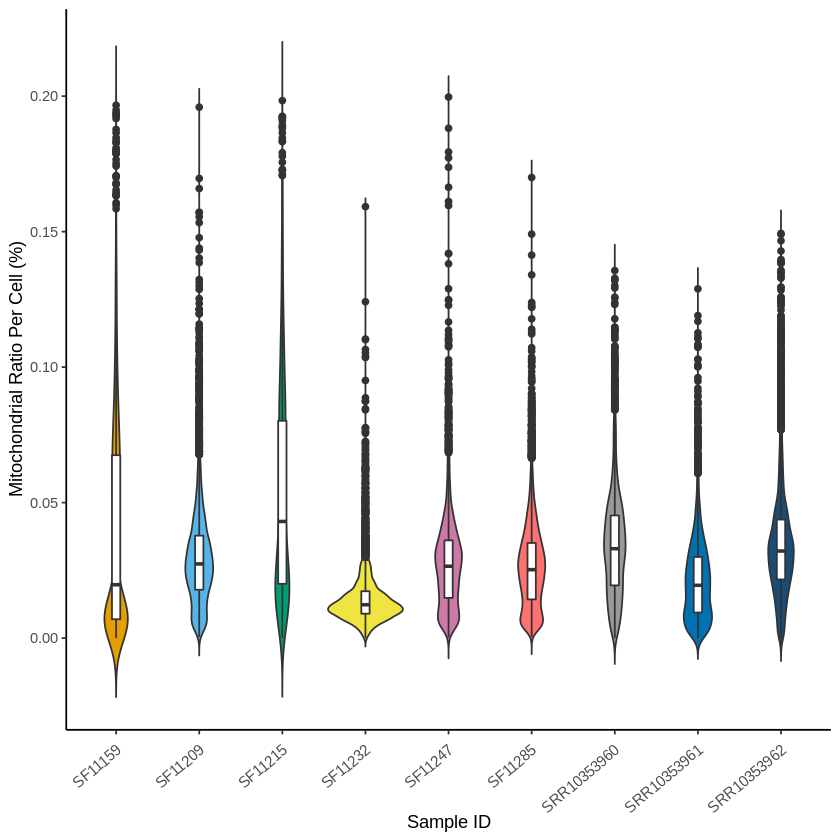

In [14]:
# Violin Plot - Average expression / cell in each cluster
p2 <- ggplot(gte@meta.data, aes(x=sampleCombined, y=mitoRatio, fill=sampleCombined)) + 
        scale_fill_manual(values = cbPalette) + 
        geom_violin(trim=FALSE) + geom_boxplot(width=0.1, fill="white") + xlab("Sample ID") + ylab("Mitochondrial Ratio Per Cell (%)") +
        theme_classic() + NoLegend() + theme(axis.text.x = element_text(angle = 40, vjust = 0.9, hjust=1))
p2

In [15]:
size = 7
ggsave("r_gbmsc_PC20r03_mitoRatio_violin_bysample_blindcolor.tiff", units="in", width=size*1.2, height=size, dpi=300, compression = 'lzw')

## Cell Cycle Genes
2022-10-28

In [5]:
# mkdirToday()
setwdToday()
getwd()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/GBMGSCTE"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-10-28"


[1] "/scratch/samkyy/gete-gbm/results/2022-10-28"

In [6]:
gte <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/gte_gbmscIntUmap-subtypes.rds") 

In [7]:
match(c('TOP2A', 'MKI67', 'PCNA', 'MCM6'), rownames(gte))

[1] 24610 16127 28135  4218

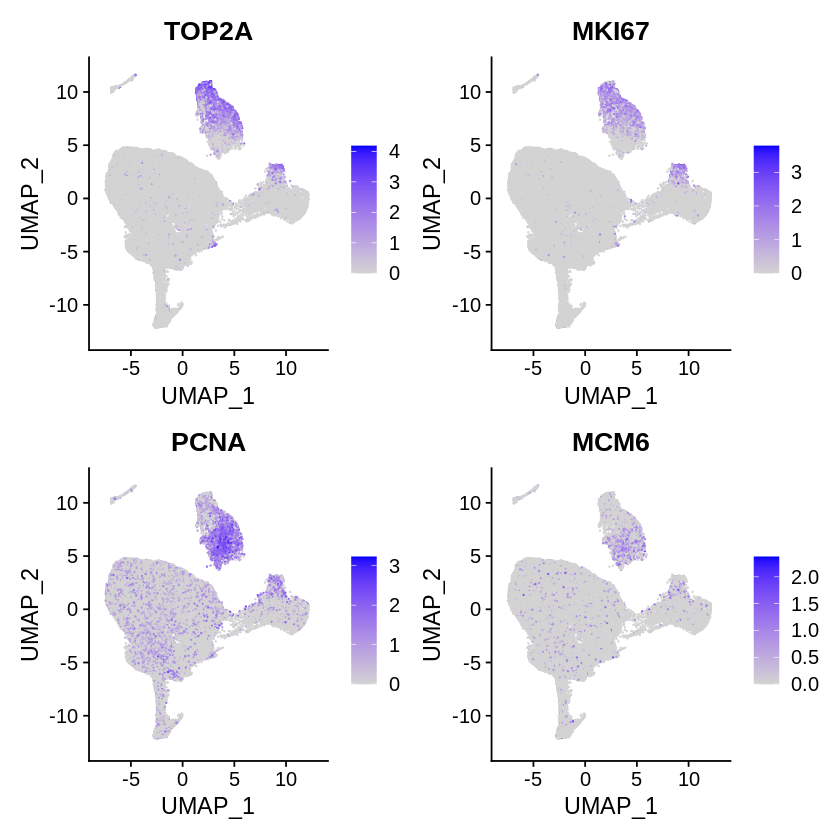

In [10]:
p2 <- FeaturePlot(object = gte, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) 
p2

In [11]:
size = 7
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [10]:
unique(gte$gbm_subtype)
gte$gbm_subtype <- factor(gte$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'))
levels(gte$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Proneural"

[1] "Classical"             "Mesenchymal"           "Proneural"            
[4] "Classical-Mesenchymal" "Mesenchymal-Proneural" "Classical-Proneural"  
[7] "Other"

In [12]:
gte@active.ident <- gte$gbm_subtype
gte@active.ident <- factor(gte@active.ident, levels = c('Other',
                                                        'Classical-Mesenchymal',
                                                        'Mesenchymal-Proneural',
                                                        'Classical-Proneural',
                                                        'Mesenchymal',
                                                        'Classical',
                                                       'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN')) 

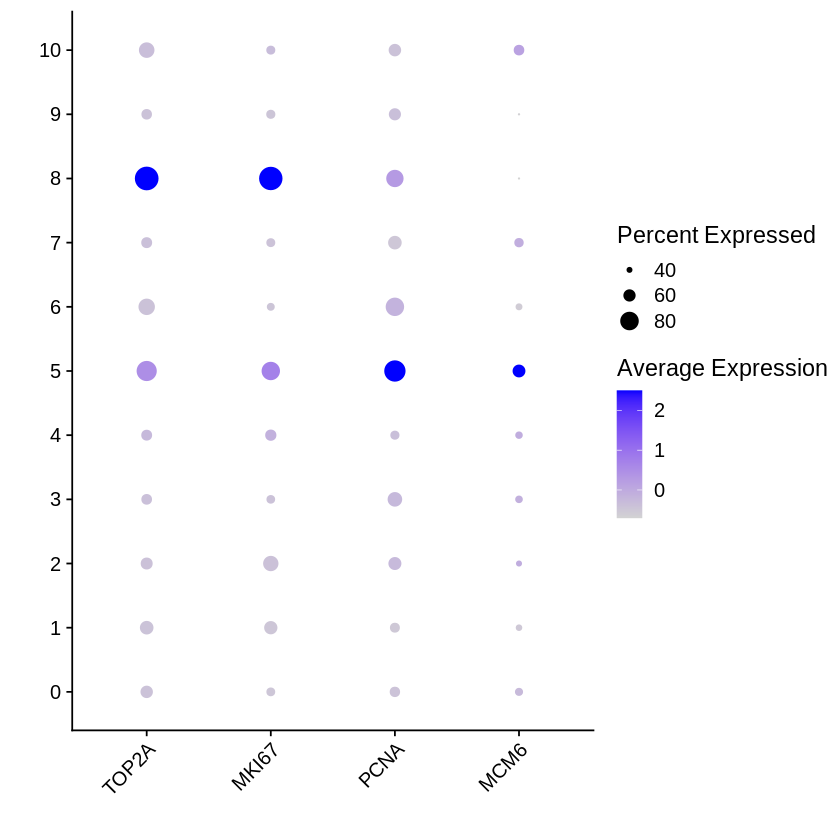

In [27]:
DefaultAssay(gte) <- "integrated"
DotPlot(gte, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [14]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot.tiff", units="in", width=5, height=2.2, dpi=300, compression = 'lzw')

In [15]:
#Full Legend
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_legend.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

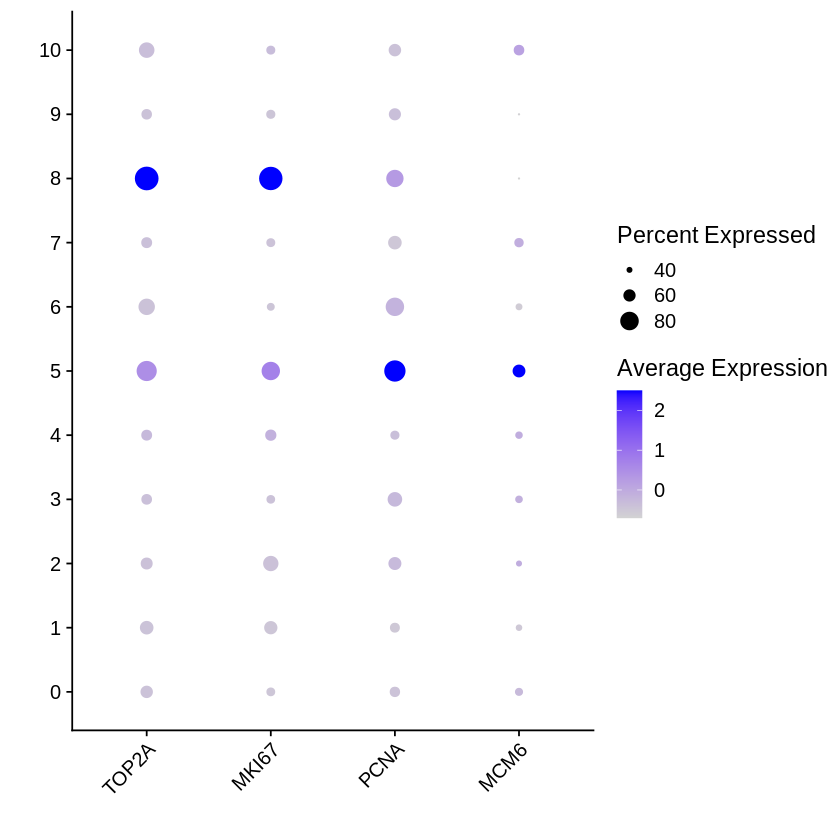

In [16]:
# Dotplot for cell cycle gene expression per cluster
DefaultAssay(gte) <- "integrated"
gte@active.ident <- gte$`integrated_snn_res.0.3`
DotPlot(gte, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [17]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_cluster.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

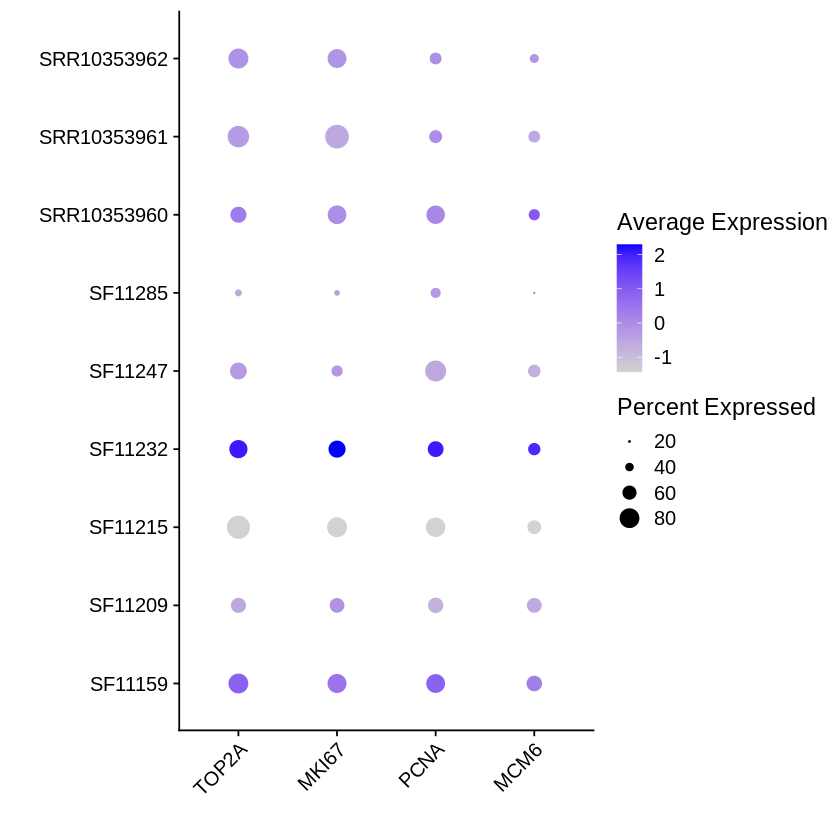

In [18]:
# Dotplot for cell cycle gene expression per sample
DefaultAssay(gte) <- "integrated"
gte@active.ident <- gte$sampleCombined
DotPlot(gte, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [19]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_samples.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

In [20]:
rm("gte")

Repeat for the UMAP without retrotransposon expression

In [6]:
ge <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/ge_gbmscIntUmap-subtypes.rds")
match(c('TOP2A', 'MKI67', 'PCNA', 'MCM6'), rownames(ge))

[1] 24804 16248 28351  4238

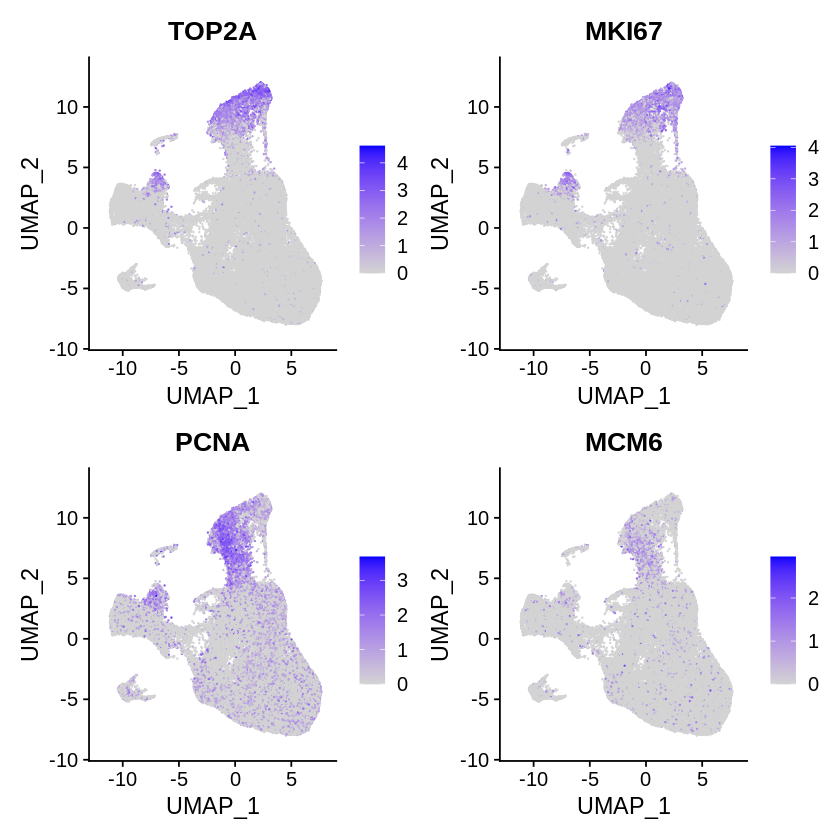

In [8]:
p2 <- FeaturePlot(object = ge, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) 
p2

In [16]:
size = 7
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [7]:
unique(ge$gbm_subtype)
ge$gbm_subtype <- factor(ge$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'))
#                                   labels = c('CL',
#                                              'MES',
#                                              'PN',
#                                              'CL-MES',
#                                              'MES-PN',
#                                              'CL-PN',
#                                              'Other'))
levels(ge$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Other"                 "Proneural"            
[7] "Mesenchymal-Proneural"

[1] "Classical"             "Mesenchymal"           "Proneural"            
[4] "Classical-Mesenchymal" "Mesenchymal-Proneural" "Classical-Proneural"  
[7] "Other"

In [8]:
# Reverse the Order of the gbm_subtype factor with Proneural leading
ge@active.ident<- ge$gbm_subtype
ge@active.ident <- factor(ge@active.ident, levels = c('Other',
                                            'Classical-Mesenchymal',
                                            'Mesenchymal-Proneural',
                                            'Classical-Proneural',
                                            'Mesenchymal',
                                            'Classical',
                                           'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN'))

In [11]:
head(Idents(ge))

GBM_AAACCTGCAATTCCTT-1 GBM_AAACCTGCACAGAGGT-1 GBM_AAACCTGGTGTGGCTC-1 
                CL-MES                    MES                     CL 
GBM_AAACGGGGTCCGAATT-1 GBM_AAACGGGTCGAATGGG-1 GBM_AAAGATGGTCTCAACA-1 
                    CL                     CL                     CL 
Levels: Other CL-MES MES-PN CL-PN MES CL PN

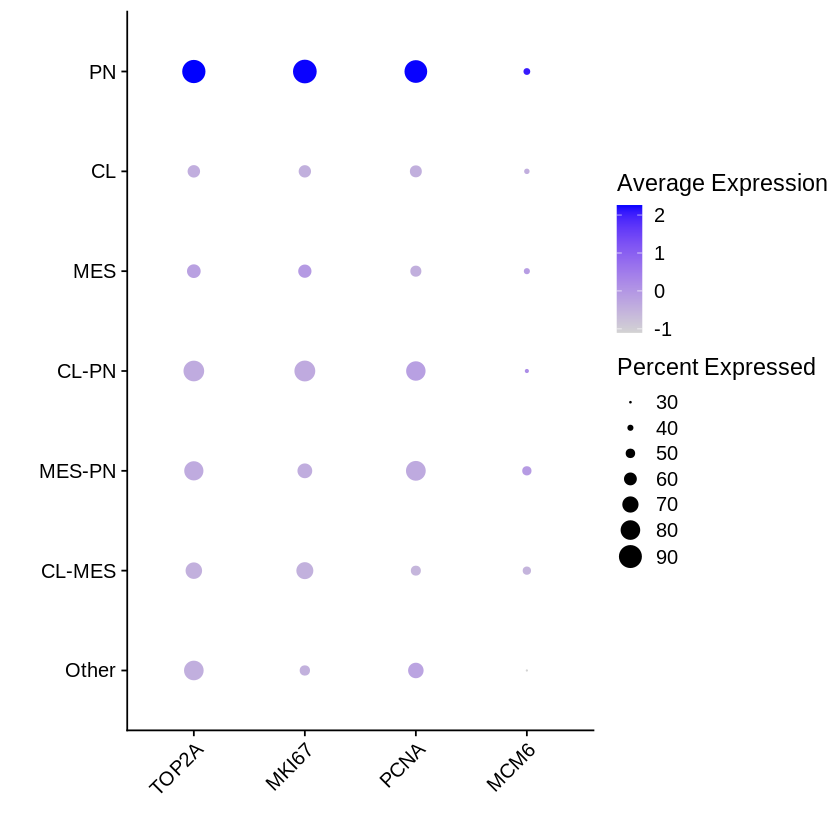

In [9]:
DefaultAssay(ge) <- "integrated"
DotPlot(ge, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [16]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot.tiff", units="in", width=5, height=2.5, dpi=300, compression = 'lzw')

In [10]:
#Full Legend
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_legend.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

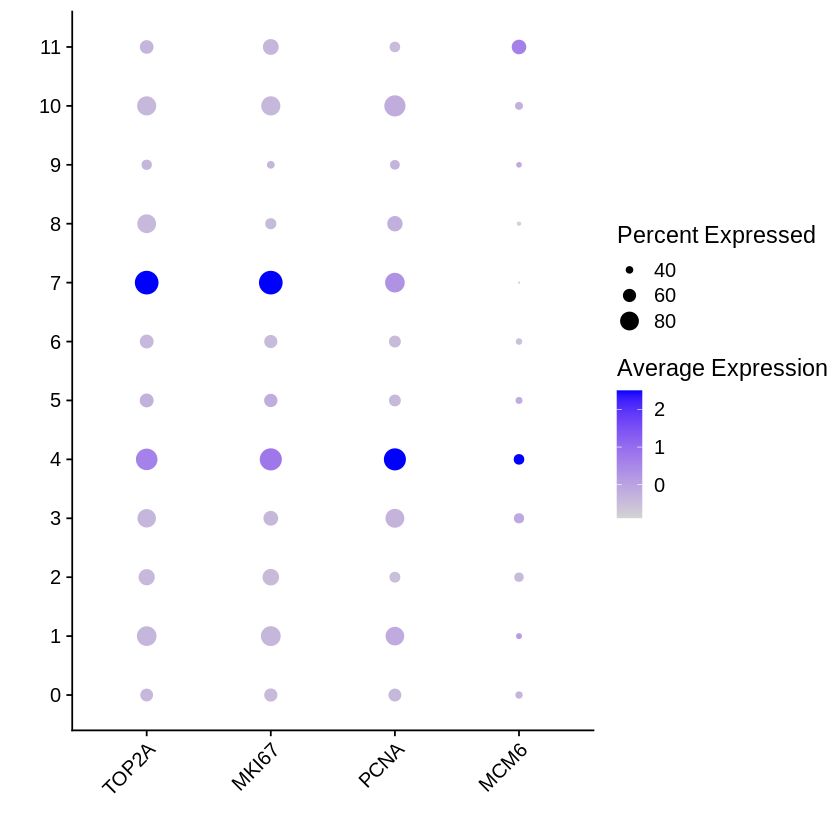

In [11]:
# Dotplot for cell cycle gene expression per cluster
DefaultAssay(ge) <- "integrated"
ge@active.ident <- ge$`integrated_snn_res.0.3`
DotPlot(ge, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [12]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_cluster.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

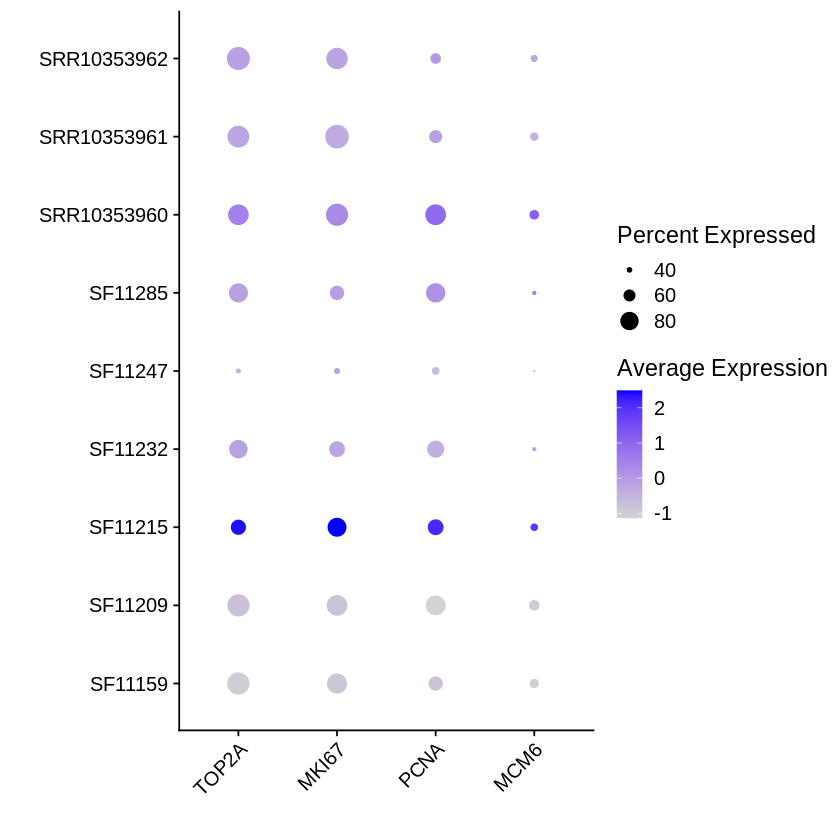

In [14]:
# Dotplot for cell cycle gene expression per sample
DefaultAssay(ge) <- "integrated"
ge@active.ident <- ge$sampleCombined
DotPlot(ge, features = c('TOP2A', 'MKI67', 'PCNA', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [15]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_samples.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

In [17]:
rm(ge)

## Cell Cycle Genes (Integrated)
2022-11-01

In [5]:
# mkdirToday()
setwdToday()
getwd()

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/GBMGSCTE"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-11-01"


[1] "/scratch/samkyy/gete-gbm/results/2022-11-01"

In [6]:
gte <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/gte_gbmscIntUmap-subtypes.rds") 

In [8]:
match(c('TOP2A', 'PCNA', 'MKI67', 'MCM6'), rownames(gte))

[1] 24610 28135 16127  4218

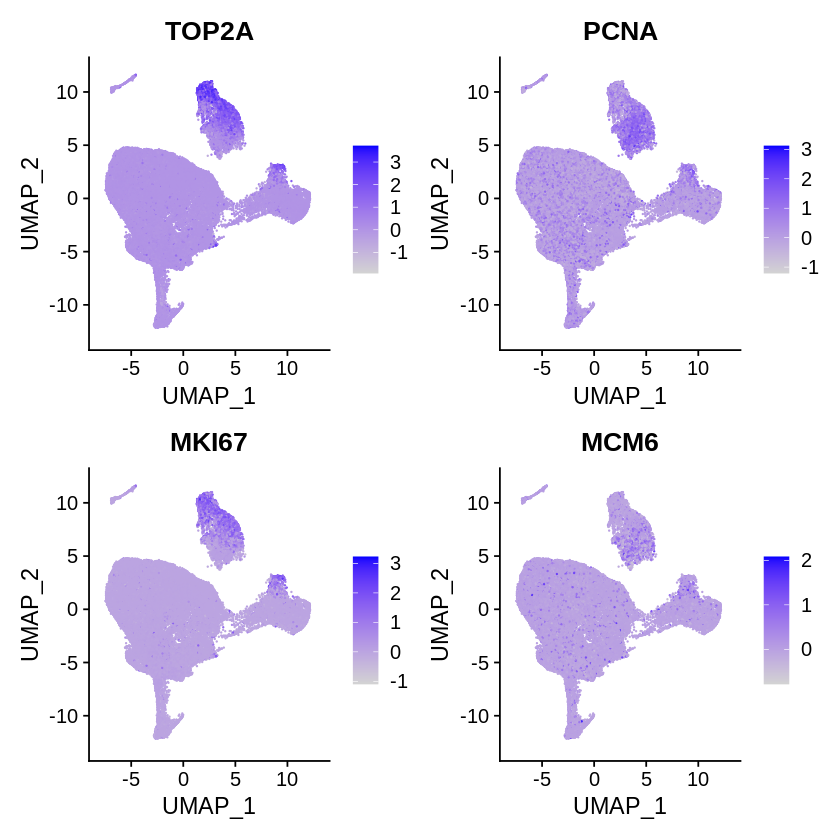

In [15]:
DefaultAssay(gte) <- "integrated" 
p2 <- FeaturePlot(object = gte, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) 
p2

In [16]:
size = 7
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_umap_integrated.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [10]:
unique(gte$gbm_subtype)
gte$gbm_subtype <- factor(gte$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'))
levels(gte$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Proneural"

[1] "Classical"             "Mesenchymal"           "Proneural"            
[4] "Classical-Mesenchymal" "Mesenchymal-Proneural" "Classical-Proneural"  
[7] "Other"

In [11]:
gte@active.ident <- gte$gbm_subtype
gte@active.ident <- factor(gte@active.ident, levels = c('Other',
                                                        'Classical-Mesenchymal',
                                                        'Mesenchymal-Proneural',
                                                        'Classical-Proneural',
                                                        'Mesenchymal',
                                                        'Classical',
                                                       'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN')) 

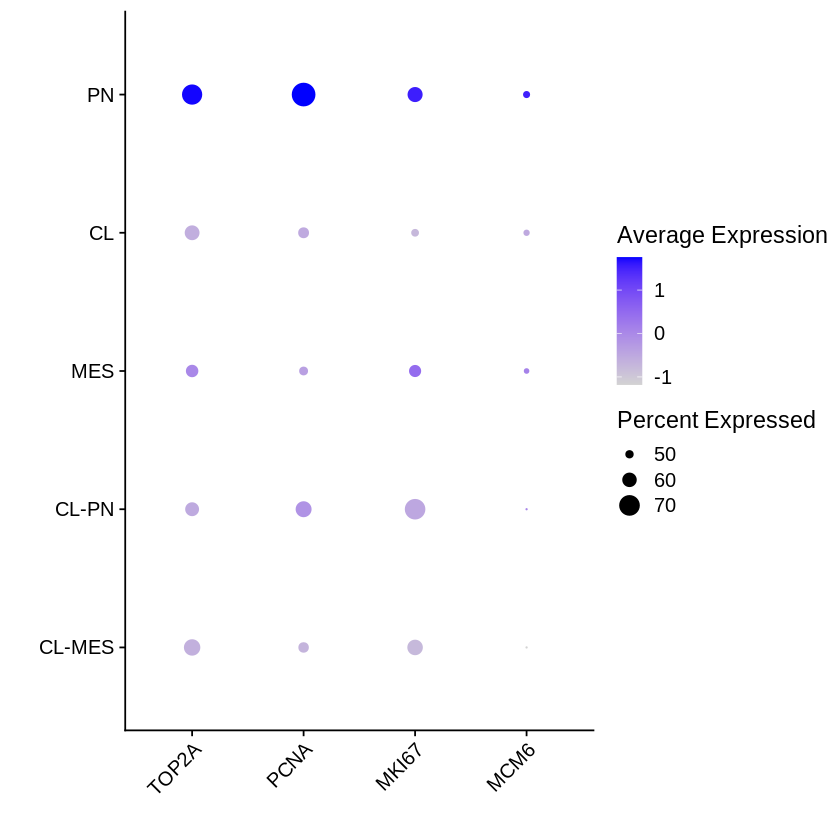

In [12]:
DefaultAssay(gte) <- "integrated"
DotPlot(gte, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [13]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot.tiff", units="in", width=5, height=2.2, dpi=300, compression = 'lzw')

In [14]:
#Full Legend
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_legend.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

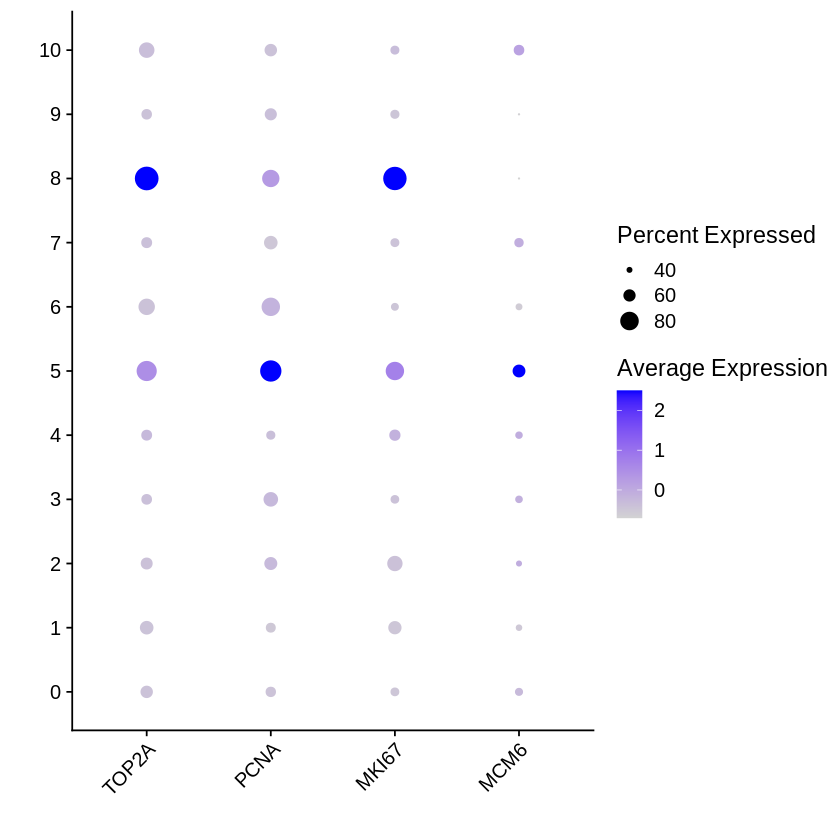

In [17]:
# Dotplot for cell cycle gene expression per cluster
DefaultAssay(gte) <- "integrated"
gte@active.ident <- gte$`integrated_snn_res.0.3`
DotPlot(gte, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [18]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_cluster.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

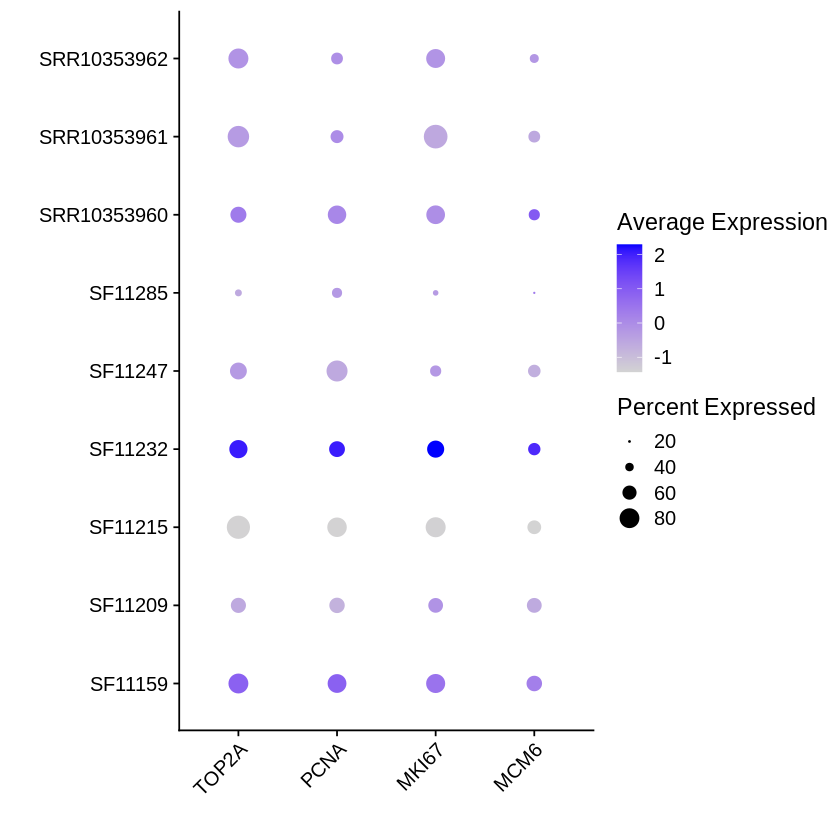

In [19]:
# Dotplot for cell cycle gene expression per sample
DefaultAssay(gte) <- "integrated"
gte@active.ident <- gte$sampleCombined
DotPlot(gte, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [20]:
ggsave("r_gbmsc_gtePC20r03_cellcyclemarkers_dot_samples.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

In [21]:
rm("gte")

Repeat for the UMAP without retrotransposon expression

In [6]:
ge <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/ge_gbmscIntUmap-subtypes.rds")
match(c('TOP2A', 'PCNA', 'MKI67', 'MCM6'), rownames(ge))

[1] 24804 28351 16248  4238

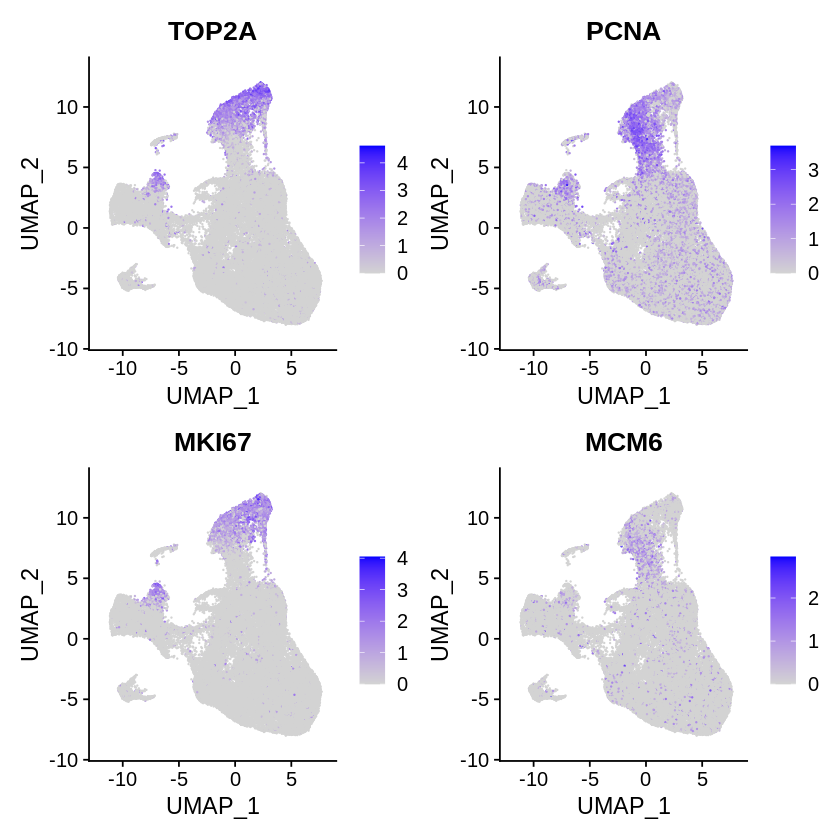

In [21]:
DefaultAssay(ge) <- "RNA"
p2 <- FeaturePlot(object = ge, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) 
p2
size = 7
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_umap.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

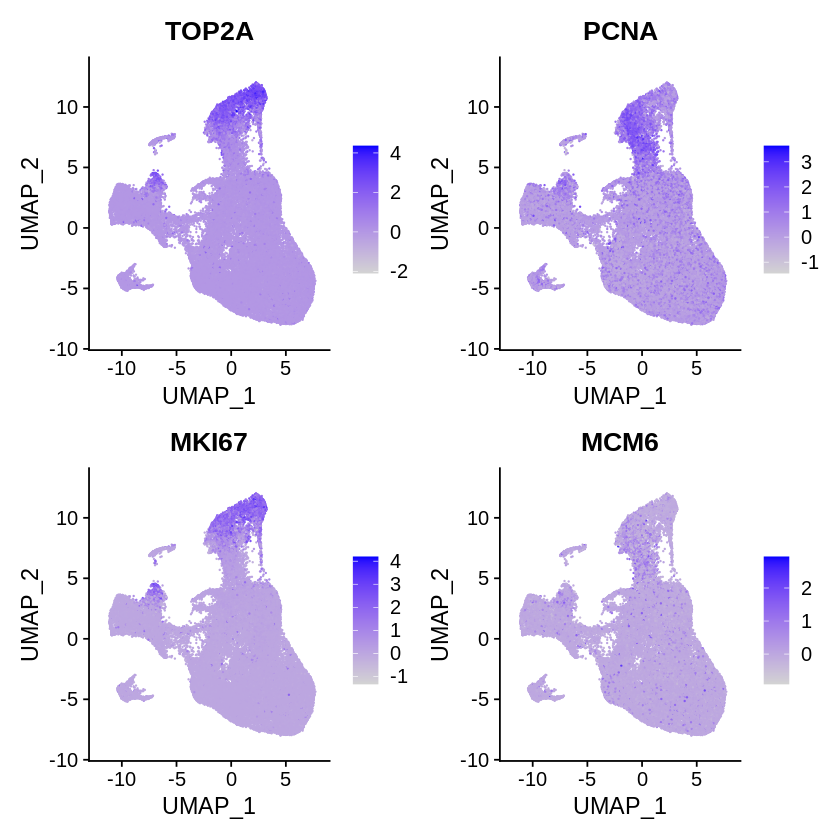

In [20]:
DefaultAssay(ge) <- "integrated"
p2 <- FeaturePlot(object = ge, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) 
p2
size = 7
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_umap_int.tiff", units="in", width=size, height=size, dpi=300, compression = 'lzw')

In [9]:
unique(ge$gbm_subtype)
ge$gbm_subtype <- factor(ge$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'))
#                                   labels = c('CL',
#                                              'MES',
#                                              'PN',
#                                              'CL-MES',
#                                              'MES-PN',
#                                              'CL-PN',
#                                              'Other'))
levels(ge$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Other"                 "Proneural"            
[7] "Mesenchymal-Proneural"

[1] "Classical"             "Mesenchymal"           "Proneural"            
[4] "Classical-Mesenchymal" "Mesenchymal-Proneural" "Classical-Proneural"  
[7] "Other"

In [10]:
# Reverse the Order of the gbm_subtype factor with Proneural leading
ge@active.ident<- ge$gbm_subtype
ge@active.ident <- factor(ge@active.ident, levels = c('Other',
                                            'Classical-Mesenchymal',
                                            'Mesenchymal-Proneural',
                                            'Classical-Proneural',
                                            'Mesenchymal',
                                            'Classical',
                                           'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN'))

In [11]:
head(Idents(ge))

GBM_AAACCTGCAATTCCTT-1 GBM_AAACCTGCACAGAGGT-1 GBM_AAACCTGGTGTGGCTC-1 
                CL-MES                    MES                     CL 
GBM_AAACGGGGTCCGAATT-1 GBM_AAACGGGTCGAATGGG-1 GBM_AAAGATGGTCTCAACA-1 
                    CL                     CL                     CL 
Levels: Other CL-MES MES-PN CL-PN MES CL PN

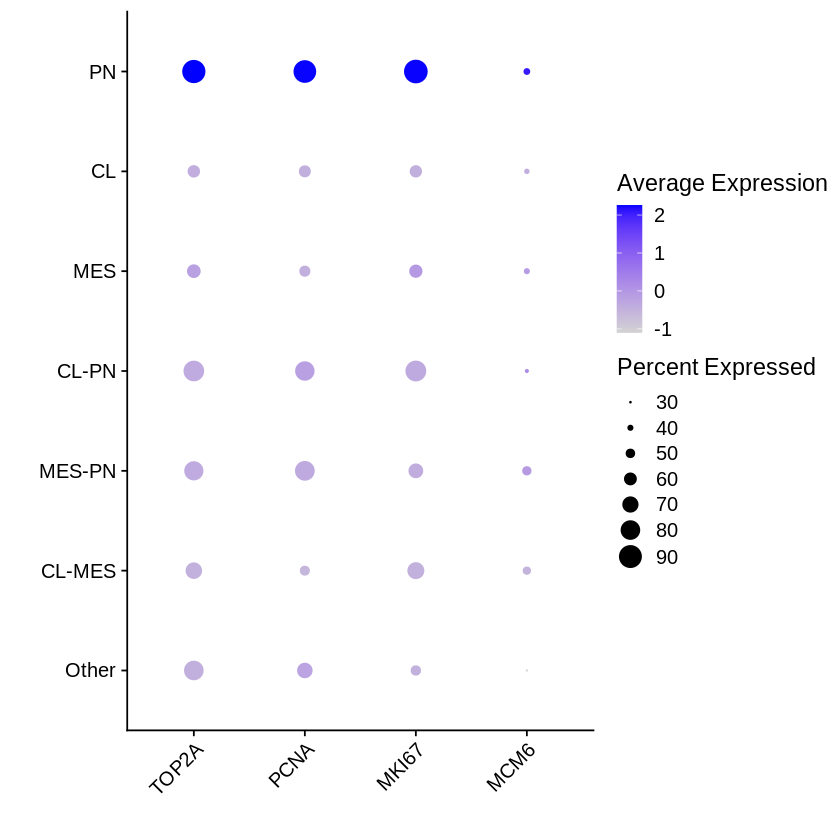

In [12]:
DefaultAssay(ge) <- "integrated"
DotPlot(ge, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [13]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot.tiff", units="in", width=5, height=2.5, dpi=300, compression = 'lzw')

In [14]:
#Full Legend
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_legend.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

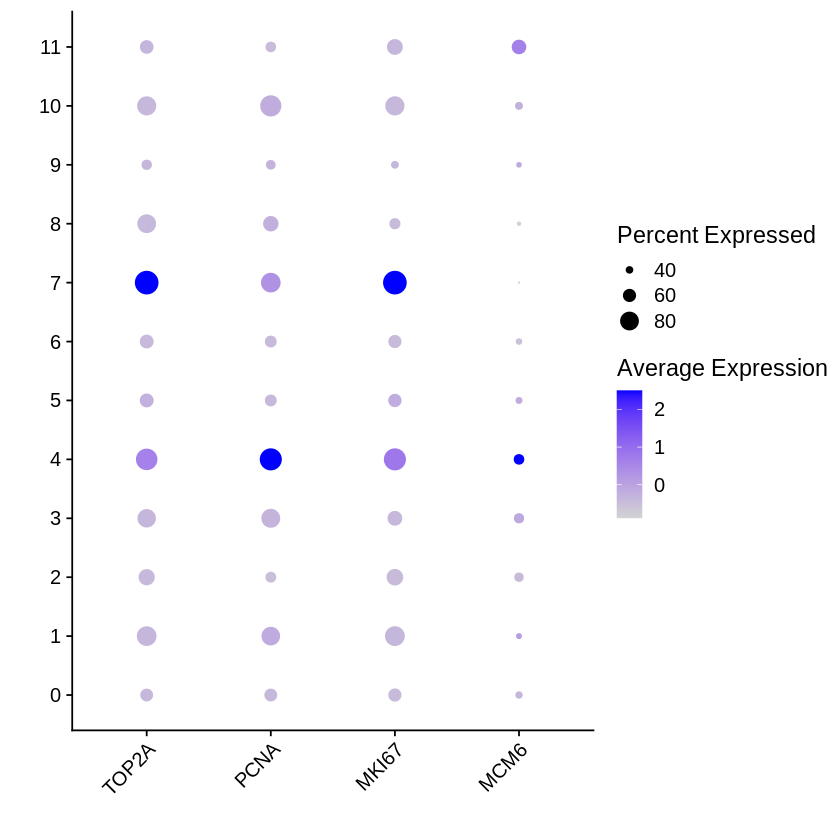

In [15]:
# Dotplot for cell cycle gene expression per cluster
DefaultAssay(ge) <- "integrated"
ge@active.ident <- ge$`integrated_snn_res.0.3`
DotPlot(ge, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [16]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_cluster.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

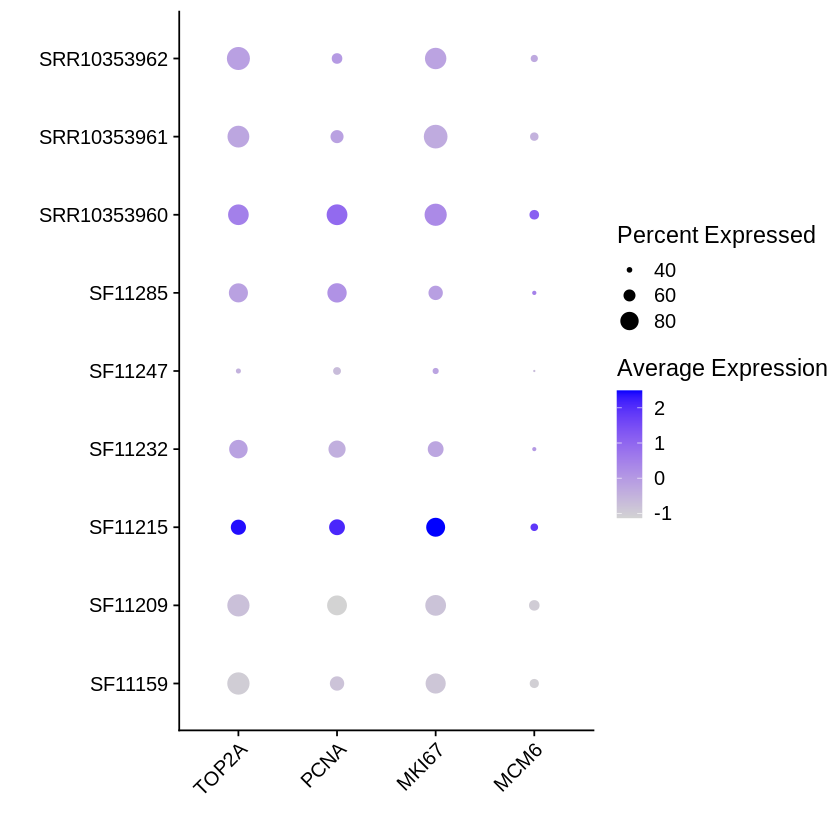

In [17]:
# Dotplot for cell cycle gene expression per sample
DefaultAssay(ge) <- "integrated"
ge@active.ident <- ge$sampleCombined
DotPlot(ge, features = c('TOP2A', 'PCNA', 'MKI67', 'MCM6')) + RotatedAxis() + 
    xlab('') + ylab('')

In [18]:
ggsave("r_gbmsc_gePC20r03_cellcyclemarkers_dot_samples.tiff", units="in", width=5, height=5, dpi=300, compression = 'lzw')

In [17]:
rm(ge)

## SessionInfo

In [10]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] conflicted_1.1.0   ggforce_0.3.3      RColorBrewer_1.1-2 gridExtra_2.3     
 [5] scales_1.1.1       RCurl_1.98-1.3     forcats_0.5.1      stringr_1.4.0     
 [9] purrr_0.3.4        readr_2.0.1    